# 클롤링은 크게 3가지
## 요청 --> 수집---> 가공

In [1]:
# 파이썬 코드를 통해서 웹사이트 정보를 받아와주는 라이브러리
# 브라우저의 역할을 대신해준다!
import requests as req

In [2]:
# req.get("URL") = 내가 원하는 정보를 요청하는 방법
# response의 응답코드가 200번이면 성공
# 404 코드에 문제 
# 500 서버에 문제
# 200~300 연결선공
res = req.get("http://www.naver.com")

In [3]:
# 응답데이터 중에 html데이터만 출력
res.text

'   <!doctype html> <html lang="ko" class="fzoom"> <head> <meta charset="utf-8"> <meta name="Referrer" content="origin"> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <title>NAVER</title> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" 

### Melon사이트 요청 (406응답)

In [7]:
# 현재 Response에 406 => 클라이언트의 요청문제!
# why? 브라우저가 아닌 코드로 접근해서 멜론서버에서 데이터를 리턴하지 않는다!
# how(어떻게 접근)? 사람인척 속이는 작업(브라우저를 ) 
req.get("https://www.melon.com/chart/index.htm")

# 멜론에서 406으로 막혀 있다?!!!



<Response [406]>

In [4]:
# user-agent = 브라우저의 정보를 담고있는데이터
# 개발자도구 네트워크 탭 --> do
# cument탭 --> headers의 맨 마지막에 존재
head = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'}


In [5]:
res = req.get("https://www.melon.com/chart/index.htm",headers = head)
res.text


'<!DOCTYPE html>\r\n<html lang="ko">\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<head>\r\n\t\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\t\r\n\r\n\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\r\n\t\r\n\r\n\t\r\n\r\n\t\r\n\r\n\t<title>멜론차트>TOP100>멜론</title>\r\n\t<meta name="keywords" content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" />\r\n\t<meta name="description" content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" />\r\n\t<meta name="naver-site-verification" content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" />\r\n\t<meta name="google-site-verification" content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" />\r\n\t<meta property="fb:app_id" content="357952407588971"/>\r\n\t<meta property="og:title" content="Melon"/>\r\n\t<meta property="og:image" content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png"/>\r\n\t

### 네이버 뉴스타이틀만 수집

In [10]:
res = req.get("https://search.naver.com/search.naver?where=news&sm=tab_jum&query=%EC%B9%BC%EB%B6%80%EB%A6%BC")

In [11]:
res.text

'<!doctype html> <html lang="ko"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="칼부림 : 네이버 뉴스검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'칼부림\'의 네이버 뉴스검색 결과입니다."> <meta name="description" lang="ko" content="\'칼부림\'의 네이버 뉴스검색 결과입니다."> <title>칼부림 : 네이버 뉴스검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><script> if (top.frames.length!=0 || window!=top) window.open(location, "_top"); </script><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.n

# BeautifulSoup 라이브러리
- req로 받아온 데이터를 컴퓨터가 이해할 수 있는 데이터로 가공

In [12]:
# stonesoup이 아닌 soup을 임포트!!!!!
from bs4 import BeautifulSoup as bs

In [13]:
# bs를 통해 컴퓨터가 컴파일 할수 있는 데이터로 가공(lxml으로 전환)
soup = bs(res.text,"lxml")

In [14]:
# 네이버의 뉴스의 타이틀만 꺼내옴

# select명령은 soup(가공된 html)에서 필요한 태그정보를 수집
# select는 리턴 타입이 list이다!!!!
# 수집한 데이터는 태그와 컨텐츠가 합쳐진 요소를 수집(요소 : 태그 + 콘텐츠)
news_title = soup.select("a.news_tit")

In [15]:
# 순수한 텍스트(컨텐츠) 정보만 저장

text_list = []

for i in news_title:
    text_list.append(i.text)
    

text_list

["'살인예고' 피의자 10대가 71명…전체 149명 중 48%",
 '“신림동 칼부림 범인, 내 악플러였다…검사실서 마주치니 끔찍”',
 "'강남역 총기 난사·대전 칼부림' 예고 글 올린 30대 다 잡혔다",
 '외신도 주목한 \'Mudjima\' 칼부림... "범죄율 낮은 국가인데..."',
 '“제 악플러가 ‘신림동 칼부림’ 조선… 1m 거리서 노려봐”',
 "'칼부림 예고' 중학생 2명 검거…살인 예고 20대도 입건",
 '"대전 칼부림" "강남역 엽총파티"… 살인예고 30대男 2명 검거',
 '[왓IS] SM→ 하이브도 칼부림 협박 “방시혁 꼭 있길”',
 '英BBC, 韓 \'묻지마 범죄\' 조명…"그래도 한국은 여전히 안전한 나라"',
 "칼부림, 묻지마 살인…'가석방 없는 종신형'이 대안일까[국회 다니는 변호사]"]

### 네이버 증권 사이트의 

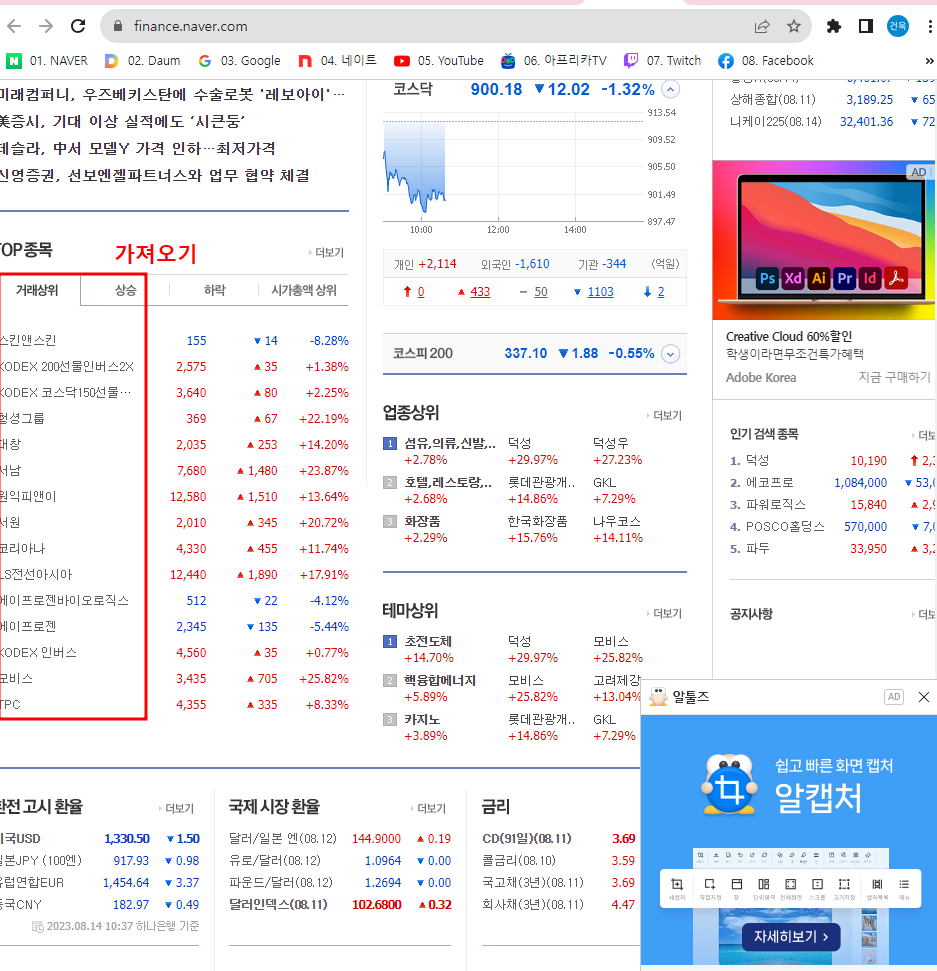

In [16]:
req.get("https://finance.naver.com/")

<Response [200]>

In [17]:
res = req.get("https://finance.naver.com/")
res.text

'<html lang="ko">\n <head> \n  <title>네이버 증권</title> \n  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" /> \n  <meta http-equiv="Content-Script-Type" content="text/javascript" /> \n  <meta http-equiv="Content-Style-Type" content="text/css" /> \n  <meta name="apple-mobile-web-app-title" content="네이버 증권" /> \n  <meta property="og:title" content="네이버 증권" /> \n  <meta property="og:image" content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" /> \n  <meta property="og:url" content="https://finance.naver.com" /> \n  <meta property="og:description" content="국내 해외 증시 지수, 시장지표, 뉴스, 증권사 리서치 등 제공" /> \n  <meta property="og:type" content="article" /> \n  <meta property="og:article:thumbnailUrl" content="" /> \n  <meta property="og:article:author" content="네이버 증권" /> \n  <meta property="og:article:author:url" content="http://FINANCE.NAVER.COM" /> \n  <link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20230808201105/css/f

In [18]:
soup = bs(res.text,"lxml")

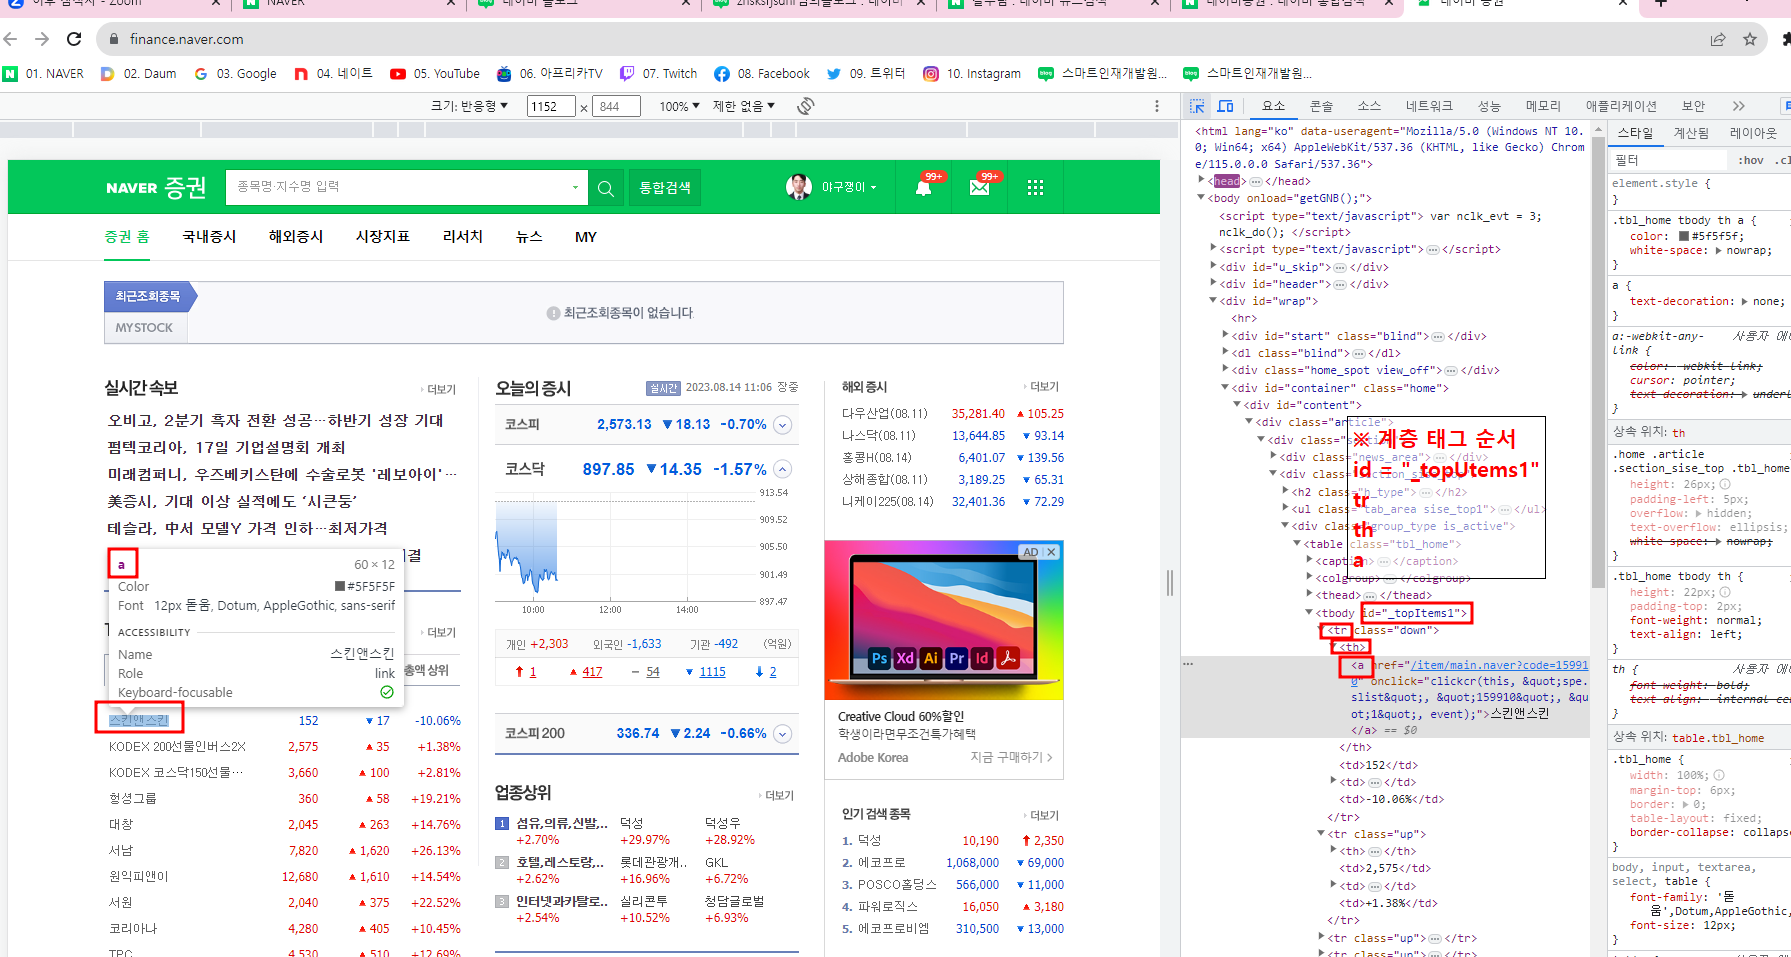

In [19]:
# 계층 태그
# id = "_topItems1"
# <tr>
# <th>
# <a>
증권_title = soup.select("#_topItems1>tr>th>a")

In [20]:
text_list = []

for i in 증권_title:
    text_list.append(i.text)
    

text_list

['스킨앤스킨',
 'KODEX 200선물인버스2X',
 'KODEX 코스닥150선물인버스',
 '우리로',
 '대창',
 '헝셩그룹',
 '한화갤러리아',
 '서남',
 '원익피앤이',
 '서원',
 'TPC',
 'LS전선아시아',
 '코리아나',
 '에이프로젠',
 'KODEX 인버스']